<a href="https://colab.research.google.com/github/dakshmehta1503/sms-spam-classifier/blob/main/main_proj_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', encoding =('ISO-8859-1'))

In [3]:
df.shape #size

(5572, 5)

In [4]:
#1.Data cleaning 
#2 EDA
#3 preprocessing
#4 model bulding 
#5 evaluating and improvemnets 
#6 website and deploy.

**1. DATA CLEANING**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#last three columns have minimul non null objects so we are dropping them.
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
#displaying after removing the items:
df.sample(5)

,v1,v2
1851,ham,Dunno da next show aft 6 is 850. Toa payoh got...
4621,ham,They finally came to fix the ceiling.
4651,ham,Where r e meeting tmr?
4039,ham,I'm at home n ready...
5031,ham,Ok i vl..do u know i got adsense approved..


In [8]:
#renaming the column names:
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)
df.sample(5)

,Target,Text
2825,ham,Ok lor...
1425,ham,I'll be at mu in like &lt;#&gt; seconds
3890,ham,No problem. We will be spending a lot of quali...
466,ham,They don't put that stuff on the roads to keep...
1606,ham,Ok no prob... I'll come after lunch then...


In [9]:
#Assinging spam = 1 and normal text(ham) = 0 by Label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#check missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [11]:
#checking for duplicate values
df.duplicated().sum()

403

In [12]:
#removal of duplicate values if found any 
df = df.drop_duplicates(keep = "first")
df.duplicated().sum()

0

**2. EDA**


In [13]:
#check the distribution of spam messagess
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

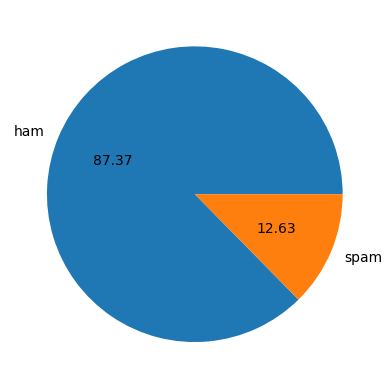

In [14]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [15]:
#Data is imbalanced.
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
# count number of characters and display it.
df['num_characters'] = df['Text'].apply(len)
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
#count the number of words 
df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [18]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
#count the number of sentences
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
#ham messages
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#spam messages
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [24]:
#plotting histograms for ham and spam for better visualization, spam messages are longer then ham
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

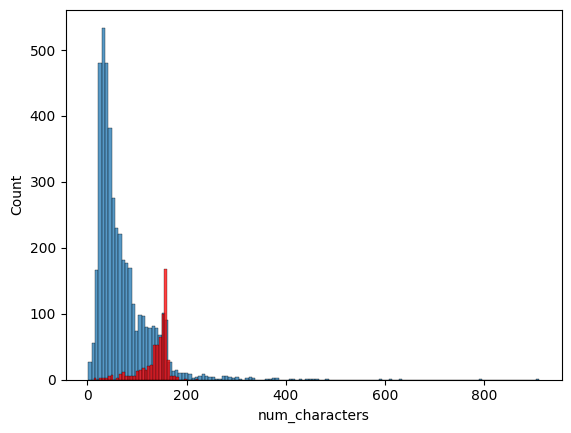

In [25]:
sns.histplot(df[df['Target'] == 0]['num_characters']) #ham
sns.histplot(df[df['Target'] == 1]['num_characters'], color='red')#spam

<ipython-input-26-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

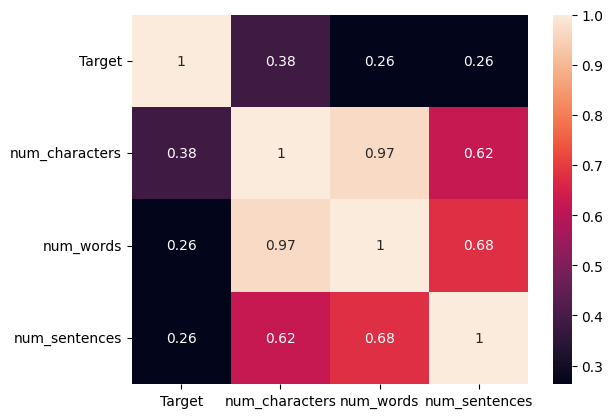

In [26]:
sns.heatmap(df.corr(), annot=True)

3. DATA PREPROCESSING

In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('danced')

'danc'

In [67]:
# function for converting into lower text
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:] 
  y.clear()   

  for i in text:
    y.append(ps.stem(i))
  return y


In [31]:
# reduce the text and add the result in the column
transform_text('Did ? you liking my presentation on Ml')

['like', 'present', 'ml']

In [32]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [33]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [34]:
df['transformed_text'] = df['transformed_text'].astype(str)

In [35]:
from nltk.classify.senna import sep
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

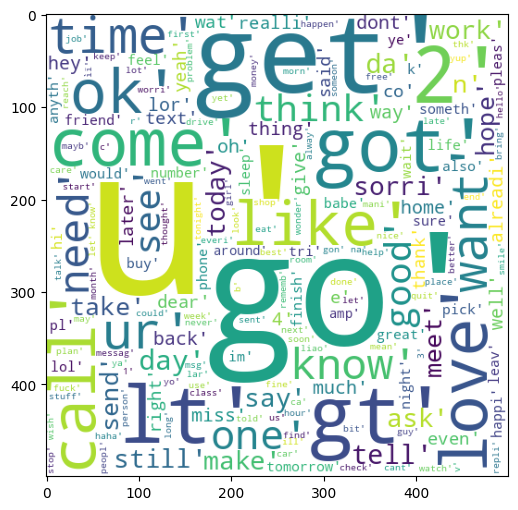

In [36]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

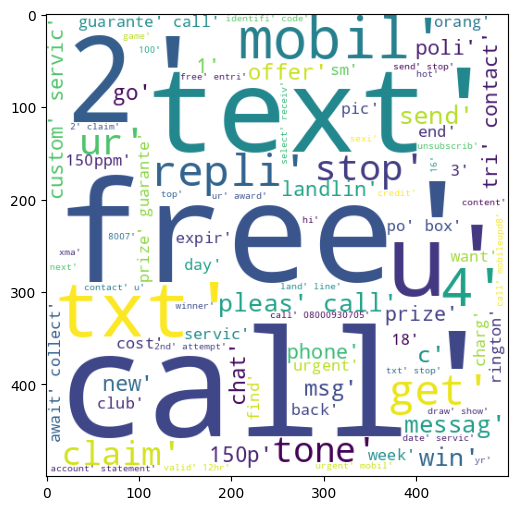

In [37]:
ham_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [38]:
# printing top 30 words
spam_corus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corus.append(word)

In [39]:
len(spam_corus)

9939

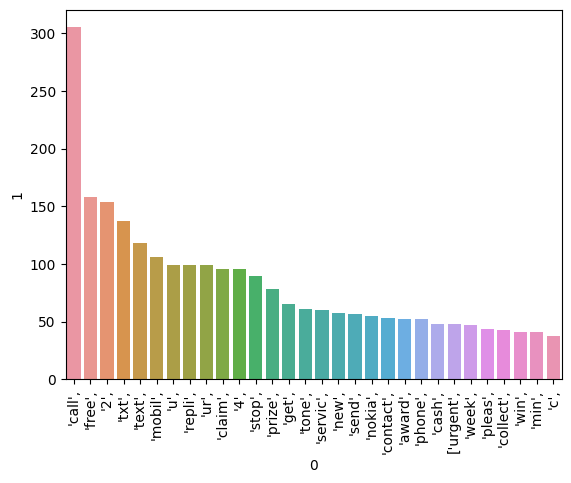

In [40]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [41]:
#top 30 words for ham
ham_corus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corus.append(word)

In [42]:
len(ham_corus)

35413

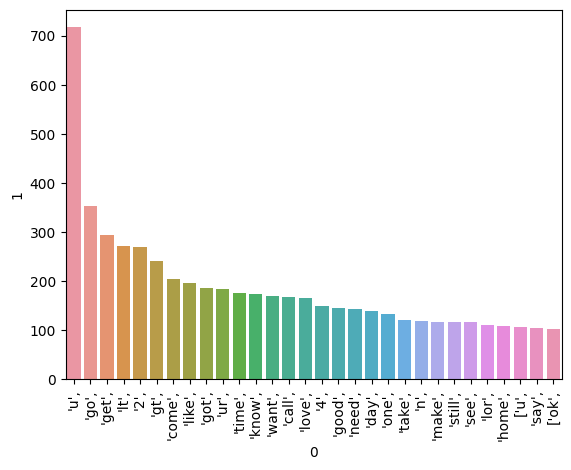

In [43]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

**4. MODEL BUILDING**

In [44]:
#using naive based algorithm for textual data 
# 1. vectorized transformed_text
# 2. then give input in naive based to find accuracy

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [47]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [48]:
X.shape

(5169, 3000)

In [49]:
y = df['Target'].values
print(y)

[0 0 1 ... 0 0 0]


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
#after seeing precision score, this is not an efficient model

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [54]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
# accuracy is good but prescision score could be better, BUT USING tfidf WE WOULD GET THE BEST RESULTS

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [55]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test) 
print(accuracy_score(y_test, y_pred3)) 
print(confusion_matrix(y_test, y_pred3)) 
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [56]:
 #tfidf --> MNB 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier  
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [58]:
#creating objects
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [59]:
#making dictionary, used in loop for training and storing models
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [60]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [61]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [62]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

  current_accuracy,current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

  print("For ", name)
  print("Accuracy -", current_accuracy)
  print("Precision -", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


For  SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For  KN
Accuracy - 0.9052224371373307
Precision - 1.0
For  NB
Accuracy - 0.9709864603481625
Precision - 1.0
For  DT
Accuracy - 0.9323017408123792
Precision - 0.8333333333333334
For  LR
Accuracy - 0.9584139264990329
Precision - 0.9702970297029703
For  RF
Accuracy - 0.9758220502901354
Precision - 0.9829059829059829
For  AdaBoost
Accuracy - 0.960348162475822
Precision - 0.9292035398230089
For  BgC
Accuracy - 0.9584139264990329
Precision - 0.8682170542635659
For  ETC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
For  GBDT
Accuracy - 0.9468085106382979
Precision - 0.9191919191919192
For  xgb
Accuracy - 0.9671179883945842
Precision - 0.9333333333333333


In [63]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [64]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [65]:
# improving model
#1. Change the max_features parameter of Ifidf

In [66]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))